<a href="https://colab.research.google.com/github/Laczadore/data_projects/blob/main/School_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Notebook made by Dawid Faliński - amateur data analyst**

**Import dataset from my PC as a data frame and make all other important imports**

In [2]:
from google.colab import files
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
data = files.upload()
data = pd.read_csv('data.csv')


Saving data.csv to data.csv


**First look at the data shape and columns**

In [3]:
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [5]:
data.shape

(6607, 20)

**Take a look if there are any NaN values**

In [6]:
print(data.isnull().sum())

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


**Since there clearly are some blank values, we should get rid off them**

In [7]:
data=data.dropna()
print(data.isnull().sum())

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


**Check if there are any duplicates**

In [ ]:
duplicates = data[data.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Hours_Studied, Attendance, Parental_Involvement, Access_to_Resources, Extracurricular_Activities, Sleep_Hours, Previous_Scores, Motivation_Level, Internet_Access, Tutoring_Sessions, Family_Income, Teacher_Quality, School_Type, Peer_Influence, Physical_Activity, Learning_Disabilities, Parental_Education_Level, Distance_from_Home, Gender, Exam_Score]
Index: []


**Take a look how different parameters are distributed as percentages in the data**

Text(0.5, 1.0, 'Access to Resources')

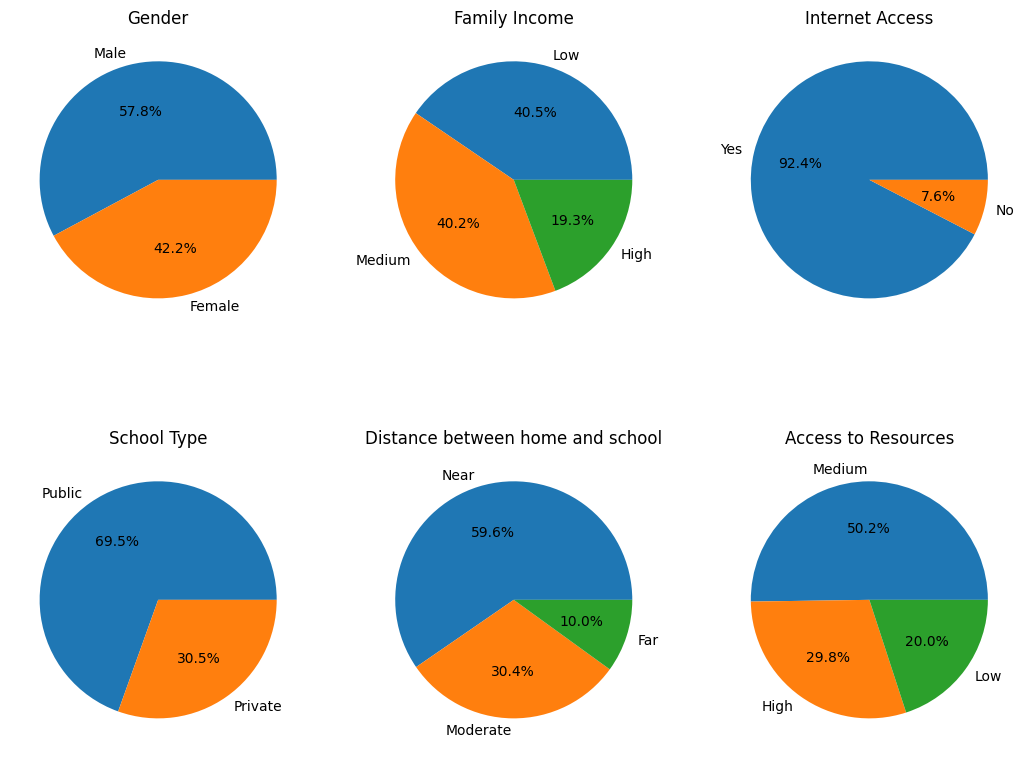

In [ ]:
plt.figure(figsize=(13,10))

plt.subplot(231)
plt.pie(data['Gender'].value_counts(), labels=data['Gender'].value_counts().index, autopct="%1.1f%%")
plt.title('Gender')

plt.subplot(232)
plt.pie(data['Family_Income'].value_counts(), labels=data['Family_Income'].value_counts().index, autopct="%1.1f%%")
plt.title('Family Income')

plt.subplot(233)
plt.pie(data['Internet_Access'].value_counts(), labels=data['Internet_Access'].value_counts().index, autopct="%1.1f%%")
plt.title('Internet Access')

plt.subplot(234)
plt.pie(data['School_Type'].value_counts(), labels=data['School_Type'].value_counts().index, autopct="%1.1f%%")
plt.title('School Type')

plt.subplot(235)
plt.pie(data['Distance_from_Home'].value_counts(), labels=data['Distance_from_Home'].value_counts().index, autopct="%1.1f%%")
plt.title('Distance between home and school')

plt.subplot(236)
plt.pie(data['Access_to_Resources'].value_counts(), labels=data['Access_to_Resources'].value_counts().index, autopct="%1.1f%%")
plt.title('Access to Resources')



**Take a look at other parameters distribution. Because of more 'bins' i prefer to visualize it with a bar plot which is basically a histogram**

Text(0.5, 1.0, 'Hours spent on sleep among students')

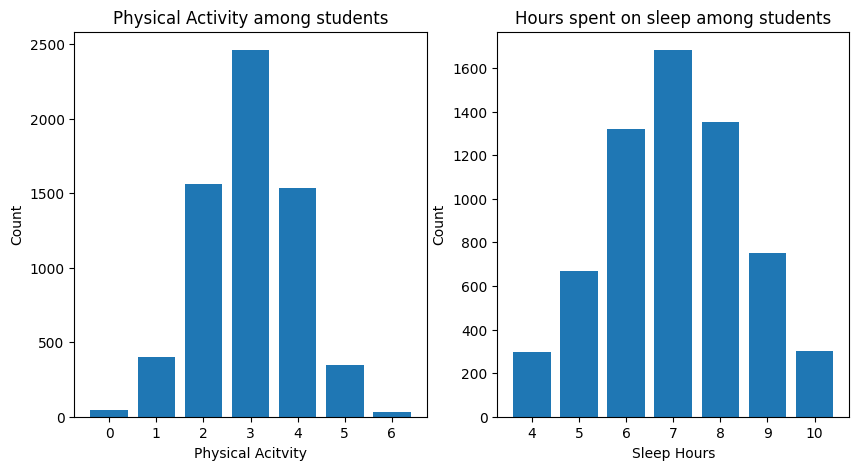

In [8]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
physic_data = data.groupby('Physical_Activity')['Physical_Activity'].count()
plt.bar(physic_data.index, physic_data.values)
plt.xlabel('Physical Acitvity')
plt.ylabel('Count')
plt.title('Physical Activity among students')


plt.subplot(1,2,2)
physic_data = data.groupby('Sleep_Hours')['Sleep_Hours'].count()
plt.bar(physic_data.index, physic_data.values)
plt.xlabel('Sleep Hours')
plt.ylabel('Count')
plt.title('Hours spent on sleep among students')


**Also use 'classic' histogram to visualize the data. What we can clearly see is that the data is normally distributed.**

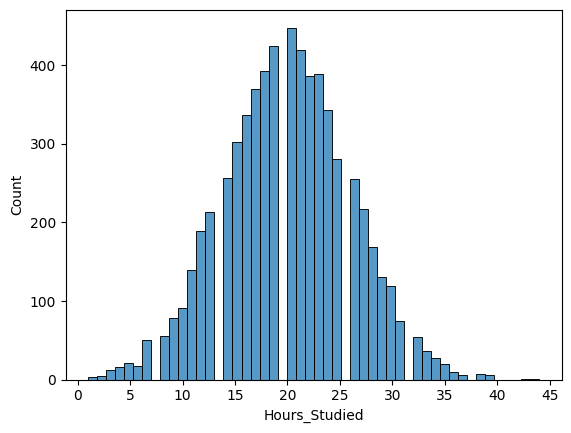

In [9]:
import seaborn as sns
sns.histplot(data['Hours_Studied'])
plt.xticks(range(0, 46, 5))
plt.show()

**Lets see correlattion matrix of for example parental involvement with exam score. Since parental involvement column does not contain text values, but strings we have to convert it with get_dummies function**

In [13]:
corr_data = data[['Exam_Score', 'Parental_Involvement']]
corr_data = pd.DataFrame(corr_data)

data_dummies = pd.get_dummies(data['Parental_Involvement'], prefix='Parental_Involvement')
corr_dummies = pd.concat([corr_data, data_dummies], axis=1)
correlations = corr_dummies[['Exam_Score', 'Parental_Involvement_Low', 'Parental_Involvement_Medium', 'Parental_Involvement_High']].corr()
correlations

,Exam_Score,Parental_Involvement_Low,Parental_Involvement_Medium,Parental_Involvement_High
Exam_Score,1.000000,-0.112410,-0.036191,0.139715
Parental_Involvement_Low,-0.112410,1.000000,-0.513661,-0.320291
Parental_Involvement_Medium,-0.036191,-0.513661,1.000000,-0.648272
Parental_Involvement_High,0.139715,-0.320291,-0.648272,1.000000


Text(0.5, 1.0, 'Distance from home impact on Exam Score')

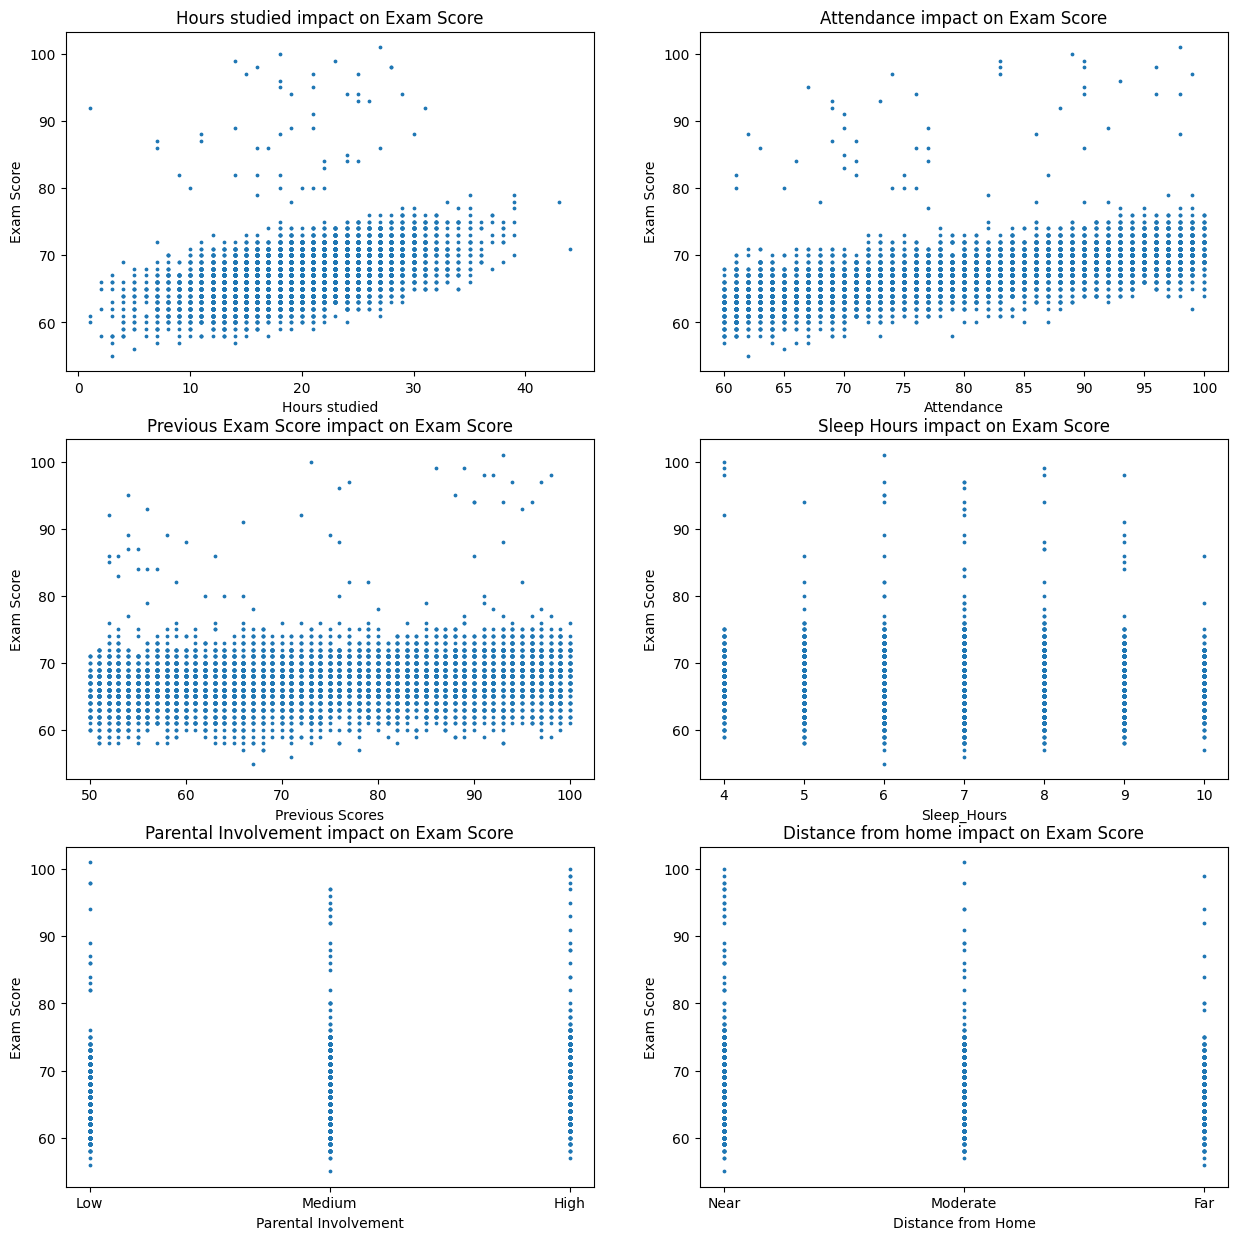

In [23]:

plt.figure(figsize=(15,15))


plt.subplot(3,2,1)
plt.scatter(data['Hours_Studied'], data['Exam_Score'], s=3)
plt.xlabel('Hours studied')
plt.ylabel('Exam Score')
plt.title('Hours studied impact on Exam Score')


plt.subplot(3,2,2)

plt.scatter(data['Attendance'], data['Exam_Score'], s=3)
plt.xlabel('Attendance')
plt.ylabel('Exam Score')
plt.title('Attendance impact on Exam Score')

plt.subplot(3,2,3)
plt.scatter(data['Previous_Scores'], data['Exam_Score'], s=3)
plt.xlabel('Previous Scores')
plt.ylabel('Exam Score')
plt.title('Previous Exam Score impact on Exam Score')

plt.subplot(3,2,4)
plt.scatter(data['Sleep_Hours'], data['Exam_Score'], s=3)
plt.xlabel('Sleep_Hours')
plt.ylabel('Exam Score')
plt.title('Sleep Hours impact on Exam Score')

plt.subplot(3,2,5)
plt.scatter(data['Parental_Involvement'], data['Exam_Score'], s=3)
plt.xlabel('Parental Involvement')
plt.ylabel('Exam Score')
plt.title('Parental Involvement impact on Exam Score')

plt.subplot(3,2,6)
plt.scatter(data['Distance_from_Home'], data['Exam_Score'], s=3)
plt.xlabel('Distance from Home')
plt.ylabel('Exam Score')
plt.title('Distance from home impact on Exam Score')

**One of last things I wanted to see is how parent's involvement is how crucial in life of students with some disabilities. Scatterplot below can show us that that students with some kind of difficulties are really relying on their parents help on at least medium level. Of course the same applies to not disabled students but to a smaller extent**

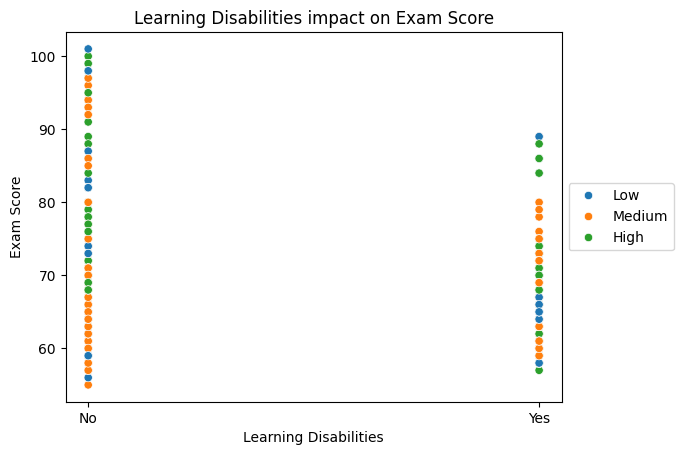

In [27]:
disability_data = data['Exam_Score'].groupby(data['Learning_Disabilities']).mean()
sns.scatterplot(data=data, x = 'Learning_Disabilities', y='Exam_Score', hue='Parental_Involvement')
plt.xlabel('Learning Disabilities')
plt.ylabel('Exam Score')
plt.title('Learning Disabilities impact on Exam Score')
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()